In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
KPI_Targets_sheet= pd.read_excel("SISCOM DASHBOARD.xlsx", sheet_name= "KPI Targets")
Cash_Flow_Comparison_sheet= pd.read_excel("SISCOM DASHBOARD.xlsx", sheet_name= "Cash Flow Comparison")
Asset_Depreciation_sheet= pd.read_excel("SISCOM DASHBOARD.xlsx", sheet_name= "Asset Depreciation")

# Calculating Investment Option performance

Looking at the Asset Depreciation sheet, 
The value of the asset at year,n= 0.8 * value of the asset at year n-1
Therefore it depreciates at a rate of 20%

In [178]:
# Function to generate list of amounts acquired upto 'yrs' years
def genYearlyAmounts(principal, intRate, depRate, yrs):
    amounts= [principal]
    for i in range(yrs):
        amounts.append(calcAmount(principal, intRate, depRate, i+1))
    return amounts

In [179]:
genYearlyAmounts(13000, 0.2, 0.2, 5)

[13000,
 12480.0,
 11980.800000000003,
 11501.568000000001,
 11041.505280000001,
 10599.8450688]

In [5]:
# Functiton to calculate investment value after 'yrs' years
def calcAmount(principal, intRate, depRate, yrs):
    depreciated= principal
    amount= principal * (1 + intRate)** yrs * (1- depRate)** yrs
    return amount

# Function to calculate return acquired in a specific year
def calcReturn(principal, intRate, depRate, yr):
    amountToday= calcAmount(principal, intRate, depRate, yr)
    amountLstYr=  calcAmount(principal, intRate, depRate, yr-1)
    interest= amountToday- amountLstYr
    return interest

# Function to generate list of interests acquired upto 'yrs' years
def genYearlyInterests(principal, intRate, depRate, yrs):
    interests= [0]
    for i in range(yrs):
        interests.append(calcReturn(principal, intRate, depRate, i+1))
    return interests

# Function to generate list of amounts acquired upto 'yrs' years
def genYearlyAmounts(principal, rate, yrs):
    amounts= [principal]
    for i in range(yrs):
        amounts.append(calcAmount(principal, intRate, depRate, i+1))
    return amounts

In [114]:
# Function to create bar chart of returns by year
def genReturnBarChart(investment, interests, amounts):
    fig, ax= plt.subplots()
    ax.bar(range(len(amounts)),amounts)
    ax.bar(range(len(interests)), interests, bottom= [a-i for a,i in zip(amounts, interests)])
    ax.set_xlabel("Year")
    ax.set_ylabel("Amount")
    ax.set_title(investment + " Returns")
    for i, j in enumerate(interests):
        if (i== 0):
            ax.text(i, interests[i]+600, "Principal", ha= "center", fontsize= 10, rotation= 90)
            continue
        y_cord= amounts[i]- interests[i]/2
        ax.text(i, y_cord, f"{j: .0f}", ha= "center", fontsize= 9)
    return fig

Looking at the Asset Depreciation sheet, 
The value of the asset at year,n= 0.8 * value of the asset at year n-1
Therefore it depreciates at a rate of 0.2%

In [117]:
# Dictionary where each key is an Investment Option 
# And the values of the keys are tuples with the investment's base investment and its yearly % return
Investments= {'BareMetal': (13000, 0.2),
        'Fractional': (13000, 0.15),
        'MMF': (13000, 0.11),
        'T-Bill': (13000, 0.12),
        'Bond': (13000, 0.13),
        'Land': (13000, 0.1)}

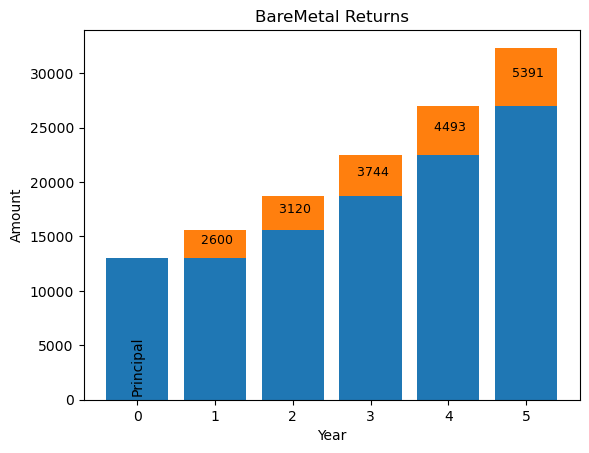

In [115]:
amounts= genYearlyAmounts(13000, 0.2, 5)
interests= genYearlyInterests(13000, 0.2, 5)
title= list(Investments.keys())[0]
fig= genReturnBarChart(title, interests, amounts)
fig

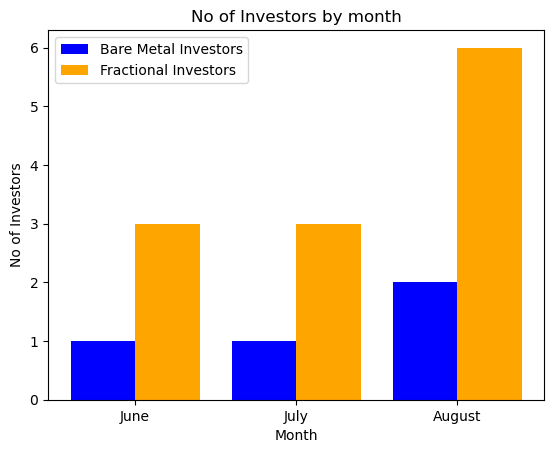

In [142]:
# Dropping last 3 rows of KPI_Targets because they're irrrelevant
KPI_Targets= KPI_Targets_sheet.dropna()

# Defining bar width and positions
x= np.arange(3)
width= 0.4

# Plotting no of investors by month
fig, ax= plt.subplots()
ax.bar(x- width/2, KPI_Targets['Bare Metal Investors'], width, color= "Blue", label= "Bare Metal Investors")
ax.bar(x+ width/2, KPI_Targets['Fractional Investors'], width, color= "Orange", label= "Fractional Investors")
ax.set_xticks(x)
ax.set_xticklabels(KPI_Targets['Month'])
ax.set_xlabel("Month")
ax.set_ylabel("No of Investors")
ax.set_title("No of Investors by month")
ax.legend()
fig

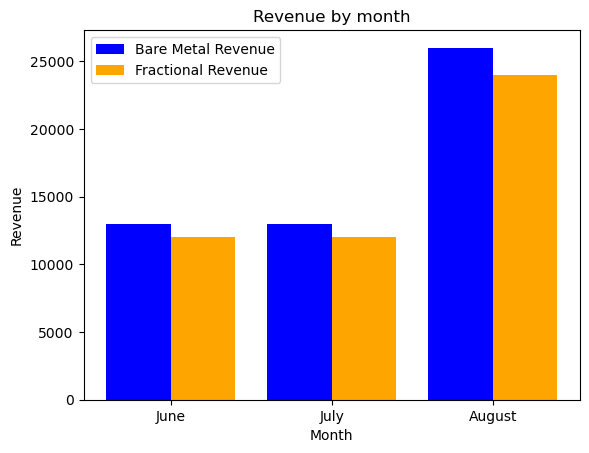

In [141]:
# Plotting revenue by month
fig, ax= plt.subplots()
ax.bar(x- width/2, KPI_Targets['Bare Metal Revenue (USD)'], width, color= "Blue", label= "Bare Metal Revenue")
ax.bar(x+ width/2, KPI_Targets['Fractional Revenue (USD)'], width, color= "Orange", label= "Fractional Revenue")
ax.set_xticks(x)
ax.set_xticklabels(KPI_Targets['Month'])
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.set_title("Revenue by month")
ax.legend()
fig